In [1]:
import Postgres
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_colwidth', -1)

# Base de dados de notícias 

Esta base de dados foi gerada a partir de algoritmos de raspagem de dados em python utilizando a biblioteca bs4.
Foram extraídas noticias de 17/04/2021 a 09/05/2021 de sites como uol.com.br, g1.globo.com.br, google-news-br e Poder360.<br>
Os dados extraídos foram armazenados em Postgresql v11x. Usando linguagem SQL com regex foram feitas limpezas do texto extraíndo textos redundantes procurando deixar somente o texto principal escrito pelo jornalista para obter a noticia.<br>
As categorias das noticias foram definidas na sessão no sítio onde foi publicado a notícia. Esta informação foi extraída na url da noticia. Foi feito um trabalho de agrupamento de categoria de mesmo significado entre os sítios, por exemplo: politica e congresso se agruparam e viraram congresso. Há alguns registros com categoria indefinida, pois esta informação não estava na url ou a descrição da categoria possui um nome genérico e os registros são referentes a assuntos diversos que estão em outras categorias. As categorias com sigla de uf indicam que as noticias são locais do referente estado. <br>
A descrição dos dados campos:<br>
**fonte**: descrição do nome do sítio no qual a notícia foi capturada.<br>
**categoria**: nome da categoria a qual pertence a noticia.<br>
**texto**: texto original extraído do sítio fonte da notícia.<br>
**url**: url onde foi extraída a noticia. Não há duas noticias com url iguais. Se houver é registro repetido.<br>
**publishedat**: data de publicação da noticia.<br>
**title**: título da noticia.<br>
**author**: nome do autor da noticía. Este registro nem sempre vem preenchido, mas está no texto da notícia. Se for importante para análise, terá que ser extraído deste campo.<br>
**dt_registro**: dia que o registro foi capturado e gravado na base de dados.<br>
text_tratado: resultado do processamento inicial de limpeza para extração de textos redundantes. 



In [2]:
df = pd.read_csv('noticias.csv', sep=';', header=0)
df.head(3)

FONTE          CATEGORIA  \
0  Poder360  ["'coronavirus'"]   
1  Poder360  ["'brasil'"]        
2  Poder360  ["'politica'"]      

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

## QUANTIDADE TOTAL DE NOTíCIAS


In [6]:
df.count()


FONTE           1553
CATEGORIA       1553
TEXTO           1553
URL             1553
PUBLISHEDAT     1553
TITLE           1553
AUTHOR          187 
DT_REGISTRO     1553
TEXT_TRATADO    1552
QT_NOTICIA      1553
dtype: int64

# QUANTIDADE TOTAL DE NOTíCIAS POR DATA DE PUBLICAÇÃO

In [37]:
df['QT_NOTICIA']=1
df['PUBLISHEDAT'] = pd.to_datetime(df['PUBLISHEDAT'])
df['PUBLISHEDAT'] = df['PUBLISHEDAT'].dt.date
dfData = df.groupby(['PUBLISHEDAT']).agg({'QT_NOTICIA':'sum'}).reset_index().sort_values(['PUBLISHEDAT'])


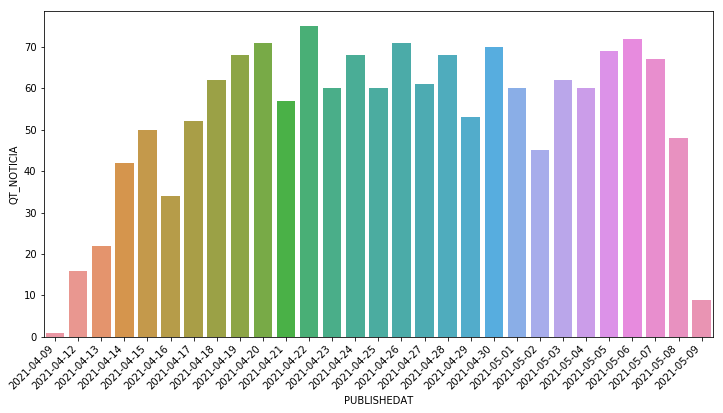

In [38]:
fig, ax = plt.subplots(figsize=(12, 6))
by_dt_Publish = sns.barplot(x=dfData['PUBLISHEDAT'], y=dfData['QT_NOTICIA'],  ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()

# QUANTIDADE DE NOTICIAS POR FONTE

In [42]:
dfFonte = df.groupby(['FONTE']).agg({'QT_NOTICIA':'sum'}).reset_index().sort_values(['QT_NOTICIA'])

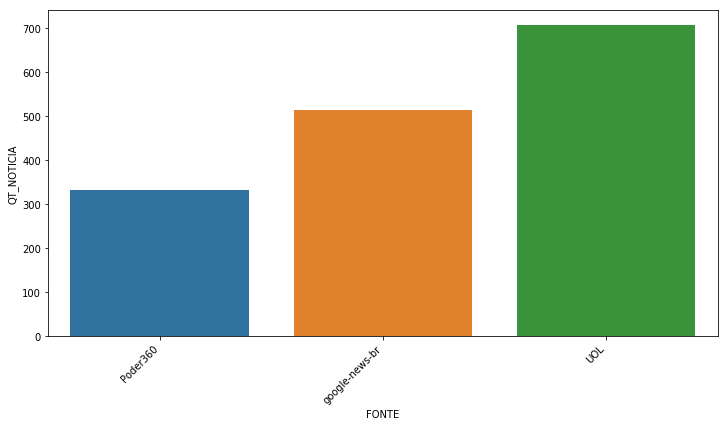

In [45]:
fig, ax = plt.subplots(figsize=(12, 6))
by_dt_Publish = sns.barplot(x=dfFonte['FONTE'], y=dfFonte['QT_NOTICIA'],  ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()

## Quantidade de noticias por categoria


In [49]:
dfCategoria = df.groupby(['CATEGORIA']).agg({'QT_NOTICIA':'sum'}).reset_index().sort_values(['QT_NOTICIA'], ascending=False)

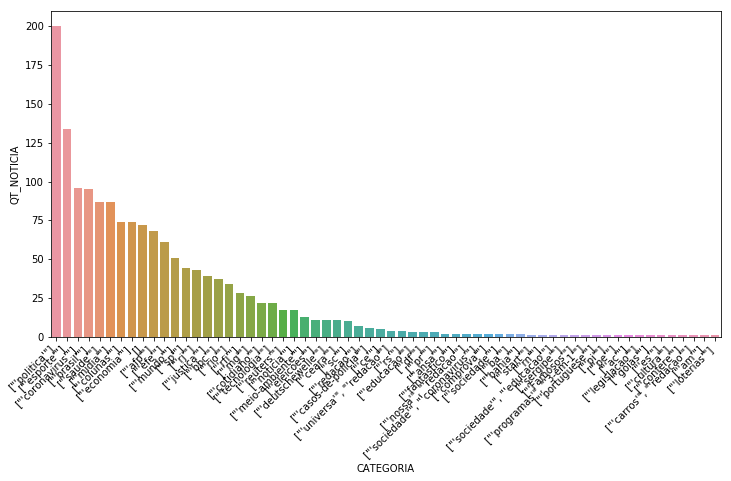

In [50]:
fig, ax = plt.subplots(figsize=(12, 6))
by_dt_Publish = sns.barplot(x=dfCategoria['CATEGORIA'], y=dfCategoria['QT_NOTICIA'],  ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()

In [51]:
dfCategoria_l = dfCategoria[dfCategoria['QT_NOTICIA']>10]

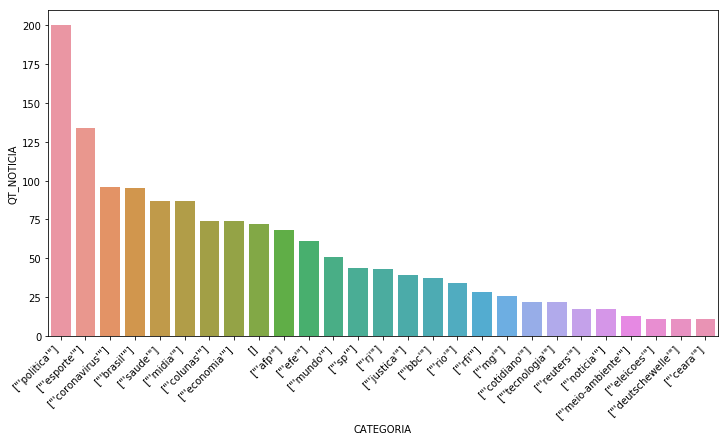

In [53]:
fig, ax = plt.subplots(figsize=(12, 6))
by_dt_Publish = sns.barplot(x=dfCategoria_l['CATEGORIA'], y=dfCategoria_l['QT_NOTICIA'],  ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()